## Entrenamiento de Autoencoder con el split de 90/10

In [1]:
import sys
import os
import hydra
from Config.config import Configuration
from AutoencoderU import AutoEncoder
import pytorch_lightning as L
from DataModule import ButterflyDataModule
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.loggers import WandbLogger
import wandb

wandb.login()

notebook_dir = os.path.dirname(os.path.abspath(os.getcwd()))
config_dir = os.path.join(notebook_dir,"proyecto-transfer-learning\\Config")
print(config_dir)

sys.argv = [arg for arg in sys.argv if not arg.startswith("--")]

@hydra.main(config_path=config_dir, config_name="config", version_base=None)
def trainining_autoencoder_ninety_10(config: Configuration):
    data_manager = ButterflyDataModule(config.DATASET.DATA_DIR,config.TRAIN.BATCH_SIZE, config.SPLIT.NEEDS_SPLIT, 
    config.SPLIT.SPLIT_RATIO,config.TRAIN.NUM_WORKERS)
    data_manager.setup()
    wandb_logger = WandbLogger(
        project="project-three-autoencoder",
        log_model=True,
    )
    autoencoder = AutoEncoder(config.TRAIN.LEARNING_RATE,config.MODEL.LATENT_DIM)
    print(type(autoencoder)) 
    trainer = L.Trainer(max_epochs=config.TRAIN.NUM_EPOCHS, accelerator=config.TRAIN.ACCELERATION,
    precision=config.TRAIN.PRECISION,callbacks=[EarlyStopping(monitor="autoencoder_val_loss", mode="min")], 
    logger=wandb_logger)
    trainer.fit(autoencoder,train_dataloaders=data_manager.unsupervised_train_loader(), 
    val_dataloaders=data_manager.test_dataloader())

    wandb_logger.experiment.finish()

#trainining_autoencoder_ninety_10()


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: r29leonc (iaredescnncnn-instituto-tecnol-gico-de-costa-rica). Use `wandb login --relogin` to force relogin


c:\Users\richa\OneDrive\Desktop\TEC\proyecto-transfer-learning\Config
<class 'AutoencoderU.AutoEncoder'>


Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | encoder | Encoder | 4.7 M  | train
1 | decoder | Decoder | 3.0 M  | train
2 | loss_fn | MSELoss | 0      | train
--------------------------------------------
7.7 M     Trainable params
0         Non-trainable params
7.7 M     Total params
30.790    Total estimated model params size (MB)
42        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\richa\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
c:\Users\richa\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
c:\Users\richa\anaconda3\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (36) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: iaredescnncnn (iaredescnncnn-instituto-tecnol-gico-de-costa-rica). Use `wandb login --relogin` to force relogin


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | encoder | Encoder | 4.7 M  | train
1 | decoder | Decoder | 3.0 M  | train
2 | loss_fn | MSELoss | 0      | train
--------------------------------------------
7.7 M     Trainable params
0         Non-trainable params
7.7 M     Total params
30.790    Total estimated model params size (MB)
42        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (36) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 19: 100%|██████████| 36/36 [30:21<00:00,  0.02it/s, v_num=r6pe, autoencoder_train_loss_step=8.83e-5, autoencoder_val_loss_step=0.000104, autoencoder_val_loss_epoch=0.000111, autoencoder_train_loss_epoch=0.00012]  

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 36/36 [30:22<00:00,  0.02it/s, v_num=r6pe, autoencoder_train_loss_step=8.83e-5, autoencoder_val_loss_step=0.000104, autoencoder_val_loss_epoch=0.000111, autoencoder_train_loss_epoch=0.00012]
Encoder weights saved to encoder_weights.pth


autoencoder_train_loss_epoch,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
autoencoder_train_loss_step,█▃▂▁▁▁▁▁▁▁▁▁▁▁
autoencoder_val_loss_epoch,█▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
autoencoder_val_loss_step,▆█▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇▇████
trainer/global_step,▁▁▁▁▁▁▂▁▁▂▁▁▁▃▁▂▂▂▂▂▂▂▅▅▅▂▂▆▂▂▂▂▂▂▂▇▂███
autoencoder_train_loss_epoch,0.00012
autoencoder_train_loss_step,8e-05
autoencoder_val_loss_epoch,0.00011
autoencoder_val_loss_step,0.0001
epoch,19


In [1]:
import sys
import os
import hydra
import torch
from Config.config import Configuration
from AutoencoderU import AutoEncoder, Encoder
import pytorch_lightning as L
from DataModule import ButterflyDataModule
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.loggers import WandbLogger
from ClassifierB import Classifier


notebook_dir = os.path.dirname(os.path.abspath(os.getcwd()))
config_dir = os.path.join(notebook_dir,"proyecto-transfer-learning\\Config")
print(config_dir)

sys.argv = [arg for arg in sys.argv if not arg.startswith("--")]

e:\proyecto-transfer-learning\Config


## Entrenamiento del Clasificador con el split 90/10 y los pesos del encoder congelados

In [3]:
@hydra.main(config_path=config_dir, config_name="config", version_base=None)
def trainining_classifier_ninety_freezed(config: Configuration):
    data_manager = ButterflyDataModule(config.DATASET.DATA_DIR,config.TRAIN.BATCH_SIZE, config.SPLIT.NEEDS_SPLIT, 
    config.SPLIT.SPLIT_RATIO,config.TRAIN.NUM_WORKERS)
    data_manager.setup()
    wandb_logger = WandbLogger(
        project="project-three-autoencoder",
        log_model=True,
    )
    encoder = Encoder(config.MODEL.LATENT_DIM)
    encoder.load_state_dict(torch.load("encoder_weights_ninety.pth"))
    classifier = Classifier(encoder,config.TRAIN.LEARNING_RATE, 20, config.MODEL.LATENT_DIM, True,
                             "classifier_ninety_ten.pth")
    trainer = L.Trainer(max_epochs=config.TRAIN.NUM_EPOCHS, accelerator=config.TRAIN.ACCELERATION,
    precision=config.TRAIN.PRECISION,callbacks=[EarlyStopping(monitor="cl_val_loss", mode="min")], 
    logger=wandb_logger)
    trainer.fit(classifier,train_dataloaders=data_manager.supervised_train_loader(), 
    val_dataloaders=data_manager.test_dataloader())

    wandb_logger.experiment.finish()

trainining_classifier_ninety_freezed()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17876\3239223829.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load("encoder_weights

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | encoder       | Encoder          | 4.7 M  | eval 
1 | fc1           | Linear           | 102 M  | train
2 | fc2           | Linear           | 32.9 K | train
3 | fc3           | Linear           | 2.6 K  | train
4 | relu          | ReLU             | 0      | train
5 | loss_function | CrossEntropyLoss | 0      | train
-----------------------------------------------------------
102 M     Trainable params
4.7 M     Non-trainable params
107 M     Total params
429.926   Total estimated model params size (MB)
5         Modules in train mode
21        Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 4/4 [00:40<00:00,  0.10it/s, v_num=fyj0, cl_train_loss_step=1.660, cl_val_loss_step=2.310, cl_val_loss_epoch=2.480, cl_train_loss_epoch=1.610]
Encoder weights saved to classifier_ninety_ten.pth


cl_train_loss_epoch,█▇▆▅▄▃▃▂▂▁
cl_val_loss_epoch,█▆▅▃▂▂▁▁▂▂
cl_val_loss_step,▅▅▆▅▆▆▄▆▃▆▃█▄▃▂▂▃▄▂▃▂▄▇▂▆▃▆▃▃▃▅▁▆▃▂▁▃▁▅▃
epoch,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
trainer/global_step,▁▁▁▁▁▂▂▂▃▃▃▄▄▄▄▄▅▃▅▅▅▃▆▆▄▆▆▇▇▇▇▄▇▇▇█▄██▅
cl_train_loss_epoch,1.61112
cl_val_loss_epoch,2.48022
cl_val_loss_step,2.30514
epoch,9
trainer/global_step,39


## Entrenamiento del Clasificador con el split 90/10 y los pesos del encoder descongelados

In [4]:
@hydra.main(config_path=config_dir, config_name="config", version_base=None)
def trainining_classifier_ninety_unfreezed(config: Configuration):
    data_manager = ButterflyDataModule(config.DATASET.DATA_DIR,config.TRAIN.BATCH_SIZE, config.SPLIT.NEEDS_SPLIT, 
    config.SPLIT.SPLIT_RATIO,config.TRAIN.NUM_WORKERS)
    data_manager.setup()
    wandb_logger = WandbLogger(
        project="project-three-autoencoder",
        log_model=True,
    )
    encoder = Encoder(config.MODEL.LATENT_DIM)
    encoder.load_state_dict(torch.load("encoder_weights_ninety.pth"))
    classifier = Classifier(encoder,config.TRAIN.LEARNING_RATE, 20, config.MODEL.LATENT_DIM, False,
                             "classifier_ninety_ten_unfreezed.pth")
    trainer = L.Trainer(max_epochs=config.TRAIN.NUM_EPOCHS, accelerator=config.TRAIN.ACCELERATION,
    precision=config.TRAIN.PRECISION,callbacks=[EarlyStopping(monitor="cl_val_loss", mode="min")], 
    logger=wandb_logger)
    trainer.fit(classifier,train_dataloaders=data_manager.supervised_train_loader(), 
    val_dataloaders=data_manager.test_dataloader())

    wandb_logger.experiment.finish()

trainining_classifier_ninety_unfreezed()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17876\1015176040.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load("encoder_weights

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | encoder       | Encoder          | 4.7 M  | train
1 | fc1           | Linear           | 102 M  | train
2 | fc2           | Linear           | 32.9 K | train
3 | fc3           | Linear           | 2.6 K  | train
4 | relu          | ReLU             | 0      | train
5 | loss_function | CrossEntropyLoss | 0      | train
-----------------------------------------------------------
107 M     Trainable params
0         Non-trainable params
107 M     Total params
429.926   Total estimated model params size (MB)
26        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 4/4 [01:05<00:00,  0.06it/s, v_num=whd0, cl_train_loss_step=1.750, cl_val_loss_step=3.660, cl_val_loss_epoch=3.130, cl_train_loss_epoch=1.830]
Encoder weights saved to classifier_ninety_ten_unfreezed.pth


cl_train_loss_epoch,███▇▇▆▅▄▃▁
cl_val_loss_epoch,█▃▃▃▂▂▁▂▂▄
cl_val_loss_step,█▆▅▂▇▅▅▅▄▄▅▅▅▄▄▃▄▇▁▄▄▄▅▃▅▄▇▄▃▆▅▃▅▆▃▅▂▁▇▇
epoch,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▂▂▃▄▂▄▄▃▅▅▅▅▅▃▅▅▆▆▆▃▆▆▇▄▇██
cl_train_loss_epoch,1.82676
cl_val_loss_epoch,3.13385
cl_val_loss_step,3.65563
epoch,9
trainer/global_step,39


## Entrenamiento de autoencoder con el split 70/30

In [3]:
@hydra.main(config_path=config_dir, config_name="config2", version_base=None)
def trainining_autoencoder_seventy_30(config: Configuration):
    data_manager = ButterflyDataModule(config.DATASET.DATA_DIR,config.TRAIN.BATCH_SIZE, config.SPLIT.NEEDS_SPLIT, 
    config.SPLIT.SPLIT_RATIO,config.TRAIN.NUM_WORKERS)
    data_manager.setup()
    wandb_logger = WandbLogger(
        project="project-three-autoencoder",
        log_model=True,
    )
    autoencoder = AutoEncoder(config.TRAIN.LEARNING_RATE,config.MODEL.LATENT_DIM)
    print(type(autoencoder)) 
    trainer = L.Trainer(max_epochs=config.TRAIN.NUM_EPOCHS, accelerator=config.TRAIN.ACCELERATION,
    precision=config.TRAIN.PRECISION,callbacks=[EarlyStopping(monitor="autoencoder_val_loss", mode="min")], 
    logger=wandb_logger)
    trainer.fit(autoencoder,train_dataloaders=data_manager.unsupervised_train_loader(), 
    val_dataloaders=data_manager.test_dataloader())

    wandb_logger.experiment.finish()

trainining_autoencoder_seventy_30()

Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


<class 'AutoencoderU.AutoEncoder'>


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: iaredescnncnn (iaredescnncnn-instituto-tecnol-gico-de-costa-rica). Use `wandb login --relogin` to force relogin


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | encoder | Encoder | 4.7 M  | train
1 | decoder | Decoder | 3.0 M  | train
2 | loss_fn | MSELoss | 0      | train
--------------------------------------------
7.7 M     Trainable params
0         Non-trainable params
7.7 M     Total params
30.790    Total estimated model params size (MB)
42        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (28) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 19: 100%|██████████| 28/28 [22:38<00:00,  0.02it/s, v_num=xufo, autoencoder_train_loss_step=9.72e-5, autoencoder_val_loss_step=0.00013, autoencoder_val_loss_epoch=0.000134, autoencoder_train_loss_epoch=0.00014]   

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 28/28 [22:39<00:00,  0.02it/s, v_num=xufo, autoencoder_train_loss_step=9.72e-5, autoencoder_val_loss_step=0.00013, autoencoder_val_loss_epoch=0.000134, autoencoder_train_loss_epoch=0.00014]
Encoder weights saved to encoder_weights.pth


autoencoder_train_loss_epoch,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
autoencoder_train_loss_step,█▃▁▁▁▁▁▁▁▁▁
autoencoder_val_loss_epoch,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
autoencoder_val_loss_step,▇█▄▄▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
trainer/global_step,▁▁▁▁▁▁▂▁▃▂▂▃▂▂▂▂▂▂▂▂▅▅▂▅▂▂▆▂▂▂▃▃▃▇▃▃▇▃█▃
autoencoder_train_loss_epoch,0.00014
autoencoder_train_loss_step,0.00013
autoencoder_val_loss_epoch,0.00013
autoencoder_val_loss_step,0.00013
epoch,19


## Entrenamiento del Clasificador con el split 70/30 y los pesos del encoder congelados

In [4]:
@hydra.main(config_path=config_dir, config_name="config2", version_base=None)
def trainining_classifier_seventy_freezed(config: Configuration):
    data_manager = ButterflyDataModule(config.DATASET.DATA_DIR,config.TRAIN.BATCH_SIZE, config.SPLIT.NEEDS_SPLIT, 
    config.SPLIT.SPLIT_RATIO,config.TRAIN.NUM_WORKERS)
    data_manager.setup()
    wandb_logger = WandbLogger(
        project="project-three-autoencoder",
        log_model=True,
    )
    encoder = Encoder(config.MODEL.LATENT_DIM)
    encoder.load_state_dict(torch.load("encoder_weights_seventy.pth"))
    classifier = Classifier(encoder,config.TRAIN.LEARNING_RATE, 20, config.MODEL.LATENT_DIM, True,
                             "classifier_seventy_thirty_freezed.pth")
    trainer = L.Trainer(max_epochs=config.TRAIN.NUM_EPOCHS, accelerator=config.TRAIN.ACCELERATION,
    precision=config.TRAIN.PRECISION,callbacks=[EarlyStopping(monitor="cl_val_loss", mode="min")], 
    logger=wandb_logger)
    trainer.fit(classifier,train_dataloaders=data_manager.supervised_train_loader(), 
    val_dataloaders=data_manager.test_dataloader())

    wandb_logger.experiment.finish()

trainining_classifier_seventy_freezed()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26528\3314474604.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load("encoder_weights

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | encoder       | Encoder          | 4.7 M  | eval 
1 | fc1           | Linear           | 102 M  | train
2 | fc2           | Linear           | 32.9 K | train
3 | fc3           | Linear           | 2.6 K  | train
4 | relu          | ReLU             | 0      | train
5 | loss_function | CrossEntropyLoss | 0      | train
-----------------------------------------------------------
102 M     Trainable params
4.7 M     Non-trainable params
107 M     Total params
429.926   Total estimated model params size (MB)
5         Modules in train mode
21        Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (12) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 19: 100%|██████████| 12/12 [00:40<00:00,  0.30it/s, v_num=92b3, cl_train_loss_step=1.880, cl_val_loss_step=1.910, cl_val_loss_epoch=2.180, cl_train_loss_epoch=2.000]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 12/12 [00:50<00:00,  0.24it/s, v_num=92b3, cl_train_loss_step=1.880, cl_val_loss_step=1.910, cl_val_loss_epoch=2.180, cl_train_loss_epoch=2.000]
Encoder weights saved to classifier_seventy_thirty_freezed.pth


cl_train_loss_epoch,███▇▇▆▅▄▄▄▄▃▃▂▂▂▁▁▁▁
cl_train_loss_step,█▄▁▄
cl_val_loss_epoch,██▇▇▆▅▅▄▃▃▃▃▂▂▂▂▁▁▂▁
cl_val_loss_step,▇▇▇▇██▇▇▆▇▆█▇▇▆▅▇▆▇▂▄▇▆▁▄▃▂▂▁▇▃▄▂▄▂▂▄▁▆▃
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
trainer/global_step,▁▁▁▂▂▂▂▃▂▂▃▄▃▃▄▄▄▅▄▄▄▆▄▄▄▅▅▅▇▅█▅▅▅█▆▆▆▆▆
cl_train_loss_epoch,2.00088
cl_train_loss_step,2.32765
cl_val_loss_epoch,2.17786
cl_val_loss_step,1.91196
epoch,19


## Entrenamiento del Clasificador con el split 70/30 y los pesos del encoder descongelados

In [ ]:
@hydra.main(config_path=config_dir, config_name="config2", version_base=None)
def trainining_classifier_seventy_unfreezed(config: Configuration):
    data_manager = ButterflyDataModule(config.DATASET.DATA_DIR,config.TRAIN.BATCH_SIZE, config.SPLIT.NEEDS_SPLIT, 
    config.SPLIT.SPLIT_RATIO,config.TRAIN.NUM_WORKERS)
    data_manager.setup()
    wandb_logger = WandbLogger(
        project="project-three-autoencoder",
        log_model=True,
    )
    encoder = Encoder(config.MODEL.LATENT_DIM)
    encoder.load_state_dict(torch.load("encoder_weights_seventy.pth"))
    classifier = Classifier(encoder,config.TRAIN.LEARNING_RATE, 20, config.MODEL.LATENT_DIM, False,
                             "classifier_seventy_thirty_unfreezed.pth")
    trainer = L.Trainer(max_epochs=config.TRAIN.NUM_EPOCHS, accelerator=config.TRAIN.ACCELERATION,
    precision=config.TRAIN.PRECISION,callbacks=[EarlyStopping(monitor="cl_val_loss", mode="min")], 
    logger=wandb_logger)
    trainer.fit(classifier,train_dataloaders=data_manager.supervised_train_loader(), 
    val_dataloaders=data_manager.test_dataloader())

    wandb_logger.experiment.finish()

trainining_classifier_seventy_unfreezed()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26528\228171684.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load("encoder_weights_

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | encoder       | Encoder          | 4.7 M  | train
1 | fc1           | Linear           | 102 M  | train
2 | fc2           | Linear           | 32.9 K | train
3 | fc3           | Linear           | 2.6 K  | train
4 | relu          | ReLU             | 0      | train
5 | loss_function | CrossEntropyLoss | 0      | train
-----------------------------------------------------------
107 M     Trainable params
0         Non-trainable params
107 M     Total params
429.926   Total estimated model params size (MB)
26        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (12) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 8: 100%|██████████| 12/12 [03:41<00:00,  0.05it/s, v_num=12ac, cl_train_loss_step=0.524, cl_val_loss_step=3.690, cl_val_loss_epoch=3.340, cl_train_loss_epoch=0.512]
Encoder weights saved to classifier_seventy_thirty_freezed.pth


cl_train_loss_epoch,█▇▆▅▅▄▃▂▁
cl_train_loss_step,█▁
cl_val_loss_epoch,▅▃▂▂▂▁▁▄█
cl_val_loss_step,▃▃▃▃▃▃▃▃▂▂▃▂▂▃▁▂▂▂▃▁▂▃▃▂▂▂▂▁▃▃▂▁▄▆▃▁▆█▃▅
epoch,▁▁▂▂▃▃▄▄▅▅▅▅▅▆▆▇▇███
trainer/global_step,▁▁▁▁▁▂▂▂▂▃▂▂▂▂▂▃▃▃▃▃▃▄▃▃▃▄▅▄▄▄▆▄▄▅▆▅▅▅▅█
cl_train_loss_epoch,0.51202
cl_train_loss_step,0.63733
cl_val_loss_epoch,3.34336
cl_val_loss_step,3.6866
epoch,8


# Entrenamientos de clasificador A desde cero

In [ ]:
from ClassifierA import ClassifierFromZero

In [ ]:


@hydra.main(config_path=config_dir, config_name="config", version_base=None)
def trainining_classifier_zero_ninety_ten(config: Configuration):
    data_manager = ButterflyDataModule(config.DATASET.DATA_DIR,config.TRAIN.BATCH_SIZE, config.SPLIT.NEEDS_SPLIT, 
    config.SPLIT.SPLIT_RATIO,config.TRAIN.NUM_WORKERS)
    data_manager.setup()
    wandb_logger = WandbLogger(
        project="project-three-autoencoder",
        log_model=True,
    )
    classifier = ClassifierFromZero(config.TRAIN.LEARNING_RATE,20,config.MODEL.LATENT_DIM, "model_a_ninety_ten.pth")
    trainer = L.Trainer(max_epochs=config.TRAIN.NUM_EPOCHS, accelerator=config.TRAIN.ACCELERATION,
    precision=config.TRAIN.PRECISION,callbacks=[EarlyStopping(monitor="cl_val_loss", mode="min")], 
    logger=wandb_logger)
    trainer.fit(classifier,train_dataloaders=data_manager.supervised_train_loader(), 
    val_dataloaders=data_manager.test_dataloader())

    wandb_logger.experiment.finish()

trainining_classifier_zero_ninety_ten()

Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: iaredescnncnn (iaredescnncnn-instituto-tecnol-gico-de-costa-rica). Use `wandb login --relogin` to force relogin


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | conv1         | Conv2d           | 1.8 K  | train
1 | conv2         | Conv2d           | 73.9 K | train
2 | conv3         | Conv2d           | 295 K  | train
3 | conv4         | Conv2d           | 1.2 M  | train
4 | relu          | ReLU             | 0      | train
5 | max_pool      | MaxPool2d        | 0      | train
6 | fc1           | Linear           | 102 M  | train
7 | fc2           | Linear           | 32.9 K | train
8 | fc3           | Linear           | 2.6 K  | train
9 | loss_function | CrossEntropyLoss | 0      | train
-----------------------------------------------------------
104 M     Trainable params
0         Non-trainable params
104 M     Total params
417.389   Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 11: 100%|██████████| 4/4 [00:47<00:00,  0.08it/s, v_num=2vbx, cl_train_loss_step=1.180, cl_val_loss_step=3.030, cl_val_loss_epoch=2.950, cl_train_loss_epoch=1.080]
Model weights saved to model_a_ninety_ten.pth


cl_train_loss_epoch,█▆▆▅▅▄▄▃▃▂▂▁
cl_val_loss_epoch,▆█▆▅▃▃▁▂▁▄▅▆
cl_val_loss_step,▆▆▆▇▆▇▆▇▆█▇▆▅▆▅▃██▆▂█▄▆▇▆▄▇▆▃▄█▄▅▅▁▄▄▅▆▁
epoch,▁▁▂▂▂▂▃▃▄▄▄▄▅▅▅▅▆▆▇▇▇▇██
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▂▂▄▄▃▄▄▄▅▃▅▅▃▆▆▆▇▇▇▄████▅
cl_train_loss_epoch,1.08126
cl_val_loss_epoch,2.95235
cl_val_loss_step,3.02705
epoch,11
trainer/global_step,47


In [3]:
@hydra.main(config_path=config_dir, config_name="config2", version_base=None)
def trainining_classifier_zero_seventy_thirty(config: Configuration):
    data_manager = ButterflyDataModule(config.DATASET.DATA_DIR,config.TRAIN.BATCH_SIZE, config.SPLIT.NEEDS_SPLIT, 
    config.SPLIT.SPLIT_RATIO,config.TRAIN.NUM_WORKERS)
    data_manager.setup()
    wandb_logger = WandbLogger(
        project="project-three-autoencoder",
        log_model=True,
    )
    classifier = ClassifierFromZero(config.TRAIN.LEARNING_RATE,20,config.MODEL.LATENT_DIM, "model_a_seventy_thirty.pth")
    trainer = L.Trainer(max_epochs=config.TRAIN.NUM_EPOCHS, accelerator=config.TRAIN.ACCELERATION,
    precision=config.TRAIN.PRECISION,callbacks=[EarlyStopping(monitor="cl_val_loss", mode="min")], 
    logger=wandb_logger)
    trainer.fit(classifier,train_dataloaders=data_manager.supervised_train_loader(), 
    val_dataloaders=data_manager.test_dataloader())

    wandb_logger.experiment.finish()

trainining_classifier_zero_seventy_thirty()

Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | conv1         | Conv2d           | 1.8 K  | train
1 | conv2         | Conv2d           | 73.9 K | train
2 | conv3         | Conv2d           | 295 K  | train
3 | conv4         | Conv2d           | 1.2 M  | train
4 | relu          | ReLU             | 0      | train
5 | max_pool      | MaxPool2d        | 0      | train
6 | fc1           | Linear           | 102 M  | train
7 | fc2           | Linear           | 32.9 K | train
8 | fc3           | Linear           | 2.6 K  | train
9 | loss_function | CrossEntropyLoss | 0      | train
-----------------------------------------------------------
104 M     Trainable params
0         Non-trainable params
104 M     Total params
417.389   Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (12) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 7: 100%|██████████| 12/12 [00:52<00:00,  0.23it/s, v_num=ggm5, cl_train_loss_step=0.899, cl_val_loss_step=1.520, cl_val_loss_epoch=1.970, cl_train_loss_epoch=0.948]
Model weights saved to model_a_seventy_thirty.pth


cl_train_loss_epoch,█▇▆▅▄▂▂▁
cl_train_loss_step,▁
cl_val_loss_epoch,█▆▄▃▁▁▃▁
cl_val_loss_step,▇▇▇▇▆▅▆▇▇▆▄▆▆▅▃▃▅▅▁▄▃▃▄▃▅▃▄▁▅▄█▃▃▂▄▃▄▇▂▂
epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
trainer/global_step,▁▁▁▁▂▂▂▂▃▃▂▂▂▃▃▄▃▃▃▃▄▄▅▅▄▄▄▄▄▆▅▅▅▅▅▅▅▅▅█
cl_train_loss_epoch,0.94773
cl_train_loss_step,1.73861
cl_val_loss_epoch,1.96898
cl_val_loss_step,1.5211
epoch,7


# Testing de los modelos

## Testing modelo Clasificador B con los pesos congelados con el entrenamiento 90/10

In [7]:
@hydra.main(config_path=config_dir, config_name="config", version_base=None)
def testing_classifier_ninety_ten_freezed(config: Configuration):
    data_manager = ButterflyDataModule(config.DATASET.DATA_DIR,config.TRAIN.BATCH_SIZE, config.SPLIT.NEEDS_SPLIT, 
    config.SPLIT.SPLIT_RATIO,config.TRAIN.NUM_WORKERS)
    data_manager.setup()
    print(len(data_manager.test_dataloader().dataset))
    wandb_logger = WandbLogger(
        project="project-three-autoencoder",
    )
    
    encoder = Encoder(config.MODEL.LATENT_DIM)
    encoder.load_state_dict(torch.load("encoder_weights_ninety.pth"))
    classifier = Classifier(encoder,config.TRAIN.LEARNING_RATE, 20, config.MODEL.LATENT_DIM, True,
                             "classifier_ninety_ten.pth")
    trainer = L.Trainer(max_epochs=config.TRAIN.NUM_EPOCHS, accelerator=config.TRAIN.ACCELERATION,
    precision=config.TRAIN.PRECISION,
    logger=wandb_logger)
    trainer.test(classifier, dataloaders=data_manager.test_dataloader())
    wandb_logger.experiment.finish()

testing_classifier_ninety_ten_freezed()

498


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11244\4177833041.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load("encoder_weights

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 8/8 [00:08<00:00,  0.92it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
 cl_test_accuracy_epoch     0.05020080506801605
    cl_test_f1_epoch        0.05020080506801605
   cl_test_loss_epoch        2.998870372772217
 cl_test_precision_epoch    0.05020080506801605
  cl_test_recall_epoch      0.05020080506801605
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


cl_test_accuracy_epoch,▁
cl_test_accuracy_step,█▁▁▁▁▁▁▁
cl_test_f1_epoch,▁
cl_test_f1_step,█▁▁▁▁▁▁▁
cl_test_loss_epoch,▁
cl_test_loss_step,▂▇▆▇▆▄█▁
cl_test_precision_epoch,▁
cl_test_precision_step,█▁▁▁▁▁▁▁
cl_test_recall_epoch,▁
cl_test_recall_step,█▁▁▁▁▁▁▁
epoch,▁


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14368\3742211013.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load(encoder_path))


Encoder(
  (enc1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (enc4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
)
1782 764
Encoder output shape: torch.Size([1, 512, 28, 28])


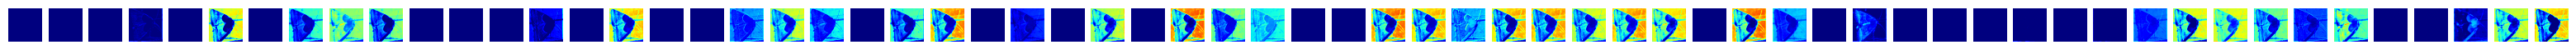

In [ ]:

import matplotlib.pyplot as plt


# Define the latent dimension (as you have it)
latent_dim = 512

# Initialize the encoder
encoder = Encoder(latent_dim)

# Load the saved weights into the encoder
encoder_path = 'encoder_weights_ninety.pth'
encoder.load_state_dict(torch.load(encoder_path))

# Set the encoder to evaluation mode for inference
encoder.eval()

# Print the encoder to verify the architecture
print(encoder)

# Initialize your DataModule
data_manager = ButterflyDataModule("./Butterflies", 64, True, 0.7, 4)
data_manager.setup()

# Get the first sample from the test dataset
sample_input, _ = data_manager.test_dataloader().dataset[0]

# Make sure the sample_input has the correct shape (batch size of 1, channels=3, height=224, width=224)
sample_input = sample_input.unsqueeze(0)  # Add batch dimension (1, 3, 224, 224)

# Pass the sample input through the encoder without calculating gradients
with torch.no_grad():
    enc_output, _ = encoder(sample_input)

# Print the shape of the encoder's output to verify it's correct
print(f"Encoder output shape: {enc_output.shape}")

# Visualize the output of the first convolutional block (enc1)
with torch.no_grad():
    enc1 = encoder.enc1(sample_input)  # First convolutional block
    enc1 = enc1[0]  # Access the first item in the batch (since batch size is 1)
    
    # Plot the feature maps from the first convolutional block (assumes enc1 is a 3D tensor: channels x height x width)
    num_channels = enc1.shape[0]
    fig, axes = plt.subplots(1, num_channels, figsize=(40, 40))
    for i in range(num_channels):
        axes[i].imshow(enc1[i].cpu(), cmap="viridis")  # Display each channel as a grayscale image
        axes[i].axis('off')  # Remove axis ticks for cleaner visualization
    plt.show()
